# Making Transport Matrices Symmetric

After some issues with the compartmental models due to some towns having a net greater inflow than outflow or vice versa, we decided a good method of keeping all populations constant is to make there be no net inflow/outflow- that is make all adjacency matrices symmetric by taking their mean.

In [8]:
#Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Read in the stochastic adjacency matrices
kl = sorted(os.listdir("/Volumes/HardDrive/New_Workflow/stochastic_53/"))
stoc = []
for item in kl:
    if '._' not in item:
        stoc.append(item)
        
d = {}
for i in range(len(stoc)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/stochastic_53/"+stoc[i], header = None)

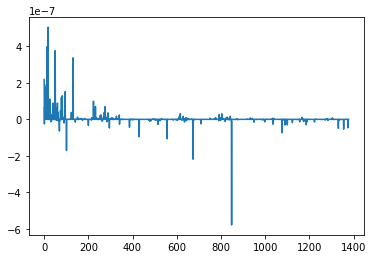

In [11]:
df = d['0'].copy()
listform = df.to_numpy().tolist()
diff = []
for i in range(len(listform)):
    for j in range(i+1,len(listform[0])):
        diff.append(listform[i][j]- listform[j][i])
plt.plot(diff)

In [12]:
new_df = []
for i in range(len(listform)):
    new = []
    for j in range(len(listform[i])):
        new.append((listform[i][j]+ listform[j][i])/2)
    new_df.append(new)

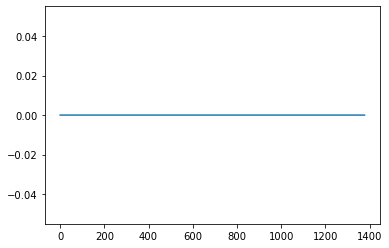

In [13]:
diff = []
listform = new_df
for i in range(len(listform)):
    for j in range(i+1,len(listform[0])):
        diff.append(listform[i][j]- listform[j][i])
plt.plot(diff)

Great, it works! Now write it into a function.

In [16]:
def even_it_out(df):
    
    listform = df.to_numpy().tolist()
    
    new_df = []
    for i in range(len(listform)):
        new = []
        for j in range(len(listform[i])):
            new.append((listform[i][j]+ listform[j][i])/2)
        new_df.append(new)
    
    return pd.DataFrame(new_df)

In [17]:
for i in range(len(stoc)):
    dp = pd.read_csv("/Volumes/HardDrive/New_Workflow/stochastic_53/"+stoc[i], header = None)
    
    df = dp.copy()
    
    new_df = even_it_out(df)
    
    new_df.to_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_53/"+stoc[i],index = False, header = False)